In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [5]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = df.drop(columns=['Survived'])
y = df['Survived']


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, stratify = y);

In [10]:
x_train['age_imputed'] = x_train['Age']
x_test['age_imputed'] = x_test['Age']

In [11]:
x_train

,Age,Fare,age_imputed
161,40.0,15.7500,40.0
817,31.0,37.0042,31.0
274,NaN,7.7500,NaN
663,36.0,7.4958,36.0
794,25.0,7.8958,25.0
...,...,...,...
50,7.0,39.6875,7.0
793,NaN,30.6958,NaN
390,36.0,120.0000,36.0
536,45.0,26.5500,45.0


In [12]:
x_test

,Age,Fare,age_imputed
318,31.0,164.8667,31.0
422,29.0,7.8750,29.0
15,55.0,16.0000,55.0
30,40.0,27.7208,40.0
497,NaN,15.1000,NaN
...,...,...,...
265,36.0,10.5000,36.0
719,33.0,7.7750,33.0
28,NaN,7.8792,NaN
82,NaN,7.7875,NaN


In [15]:
x_train['age_imputed'][x_train['age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

/tmp/ipython-input-336110198.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['age_imputed'][x_train['age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


In [16]:
x_test['age_imputed'][x_test['age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

/tmp/ipython-input-3869885262.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['age_imputed'][x_test['age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


In [17]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Density'>

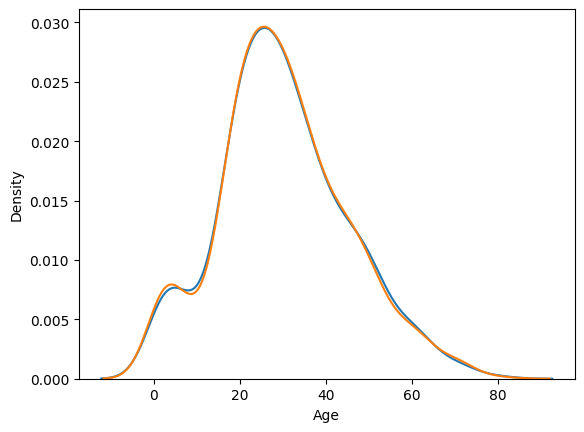

In [18]:
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['age_imputed'])